In [1]:
import numpy as np
import os
from PIL import Image
import numpy as np
import PIL.Image as pil
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10, MNIST, FashionMNIST

In [2]:
def convert_to_rgb(images: np.ndarray) -> np.ndarray:
    """
    Converts grayscale images to RGB. It changes NxHxWx1 to a NxHxWx3 array, where N is the number of figures,
    H is the high and W the width.
    :param images: Grayscale images of shape (NxHxWx1).
    :return: Images in RGB format of shape (NxHxWx3).
    """
    dims = np.shape(images)
    if not ((len(dims) == 4 and dims[-1] == 1) or len(dims) == 3):
        raise ValueError("Unexpected shape for grayscale images:" + str(dims))

    if dims[-1] == 1:
        # Squeeze channel axis if it exists
        rgb_images = np.squeeze(images, axis=-1)
    else:
        rgb_images = images
    rgb_images = np.stack((rgb_images,) * 3, axis=-1)

    return rgb_images
    
def create_sprite(images: np.ndarray) -> np.ndarray:
    """
    Creates a sprite of provided images.
    :param images: Images to construct the sprite.
    :return: An image array containing the sprite.
    """
    shape = np.shape(images)

    if len(shape) < 3 or len(shape) > 4:
        raise ValueError("Images provided for sprite have wrong dimensions " + str(len(shape)))

    if len(shape) == 3:
        # Check to see if it's MNIST type of images and add axis to show image is gray-scale
        images = np.expand_dims(images, axis=3)
        shape = np.shape(images)

    # Change black and white images to RGB
    if shape[3] == 1:
        images = convert_to_rgb(images)

    n = int(np.ceil(np.sqrt(images.shape[0])))
    padding = ((0, n ** 2 - images.shape[0]), (0, 0), (0, 0)) + ((0, 0),) * (images.ndim - 3)
    images = np.pad(images, padding, mode="constant", constant_values=0)

    # Tile the individual thumbnails into an image
    images = images.reshape((n, n) + images.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, images.ndim + 1)))
    images = images.reshape((n * images.shape[1], n * images.shape[3]) + images.shape[4:])
    sprite = (images * 255).astype(np.uint8)

    return sprite

In [3]:
train_dataset = CIFAR10(root="data", train=True, download=True)
test_dataset = CIFAR10(root="data", train=False, download=True)
data = np.concatenate((train_dataset.data, test_dataset.data), axis=0)/255

Files already downloaded and verified
Files already downloaded and verified


In [2]:
train_dataset = MNIST(root="data", train=True, download=True)
test_dataset = MNIST(root="data", train=False, download=True)
# all_data = np.concatenate((train_dataset.data, test_dataset.data), axis=0)

In [9]:
train_dataset = FashionMNIST(root="data", train=True, download=True)
test_dataset = FashionMNIST(root="data", train=False, download=True)

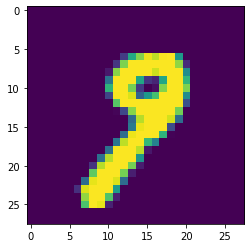

In [6]:
image1 = test_dataset.data[73]
image1 = image1.numpy().astype(np.uint8)
plt.imshow(image1.astype(np.uint8), interpolation='nearest')

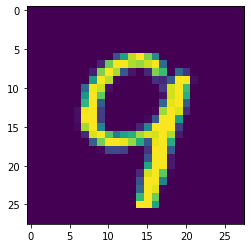

In [7]:
image2 = test_dataset.data[16]
image2 = image2.numpy().astype(np.uint8)
plt.imshow(image2.astype(np.uint8), interpolation='nearest')

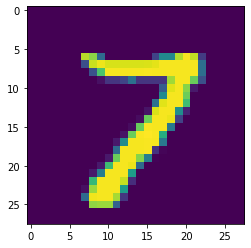

In [29]:
image3 = test_dataset.data[34]
image3 = image3.numpy().astype(np.uint8)
plt.imshow(image3.astype(np.uint8), interpolation='nearest')

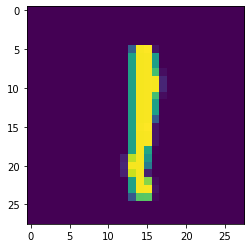

In [8]:
image4 = train_dataset.data[18176]
image4 = image4.numpy().astype(np.uint8)
plt.imshow(image4.astype(np.uint8), interpolation='nearest')

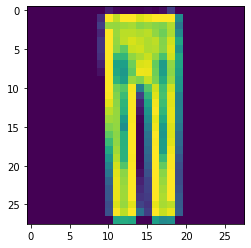

In [10]:
image5 = train_dataset.data[1024]
image5 = image5.numpy().astype(np.uint8)
plt.imshow(image5.astype(np.uint8), interpolation='nearest')

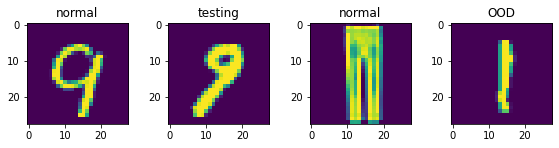

In [11]:
num_row = 1
num_col = 4
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))

ax = axes[0]
ax.imshow(image2)
ax.set_title("normal")

ax = axes[1]
ax.imshow(image1)
ax.set_title("testing")

ax = axes[2]
ax.imshow(image5)
ax.set_title("normal")

ax = axes[3]
ax.imshow(image4)
ax.set_title("OOD")

plt.tight_layout()
plt.savefig("explanation.pdf", dpi=400)

In [4]:
sprite = create_sprite(data) 

In [5]:
file_name = "mnist.png"
image = Image.fromarray(sprite)
image.save(file_name)

In [7]:
path = "/home/xianglin/projects/DVI_data/noisy/symmetric/mnist/10/sprites"
os.makedirs(path, exist_ok=True)
for i in range(70000):
    image = Image.fromarray(all_data[i])
    image.save(os.path.join(path, "{}.png".format(i)))
